# Plot some categories from the Steam Hardware Survey dataset

In [1]:
!pip install -qq --no-cache-dir seaborn
!curl -LO https://github.com/myagues/steam-hss-data/releases/download/2021.12/steam_hw_survey.parquet

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   662  100   662    0     0   2168      0 --:--:-- --:--:-- --:--:--  2170
100  683k  100  683k    0     0   610k      0  0:00:01  0:00:01 --:--:--  876k


In [2]:
from datetime import datetime
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pandas.api.types import CategoricalDtype

%config InlineBackend.figure_format = 'retina'

In [3]:
df = pd.read_parquet("steam_hw_survey.parquet")
df.dtypes
df["category"] = df["category"].astype("category")
df["platform"] = df["platform"].astype("category")
df

,index,perc,category,date,platform
0,Unspecified,10.01,Network Speed,2004-04-01,pc
1,14.4 Kbps,0.10,Network Speed,2004-04-01,pc
2,28.8 Kbps,0.18,Network Speed,2004-04-01,pc
3,33.6 Kbps,0.13,Network Speed,2004-04-01,pc
4,56.0 Kbps,3.38,Network Speed,2004-04-01,pc
...,...,...,...,...,...
262465,AVX512F,3.18,Other Settings,2021-12-01,linux
262466,AVX512ER,0.00,Other Settings,2021-12-01,linux
262467,PrefetchW,0.00,Other Settings,2021-12-01,linux
262468,NTFS,0.00,Other Settings,2021-12-01,linux


List categories throughout the years, some may be specific to a platform, and others are only available for some months or years.

In [4]:
df["category"].cat.categories

Index(['16:9 Aspect Primary Displays', '4:3 Aspect Primary Displays',
       'AGP GART Settings', 'AMD CPU Speeds', 'ATI Drivers', 'Audio Devices',
       'Bus Types', 'CPU', 'Cards which default to DirectX 7 Path on Source',
       'Cards which default to DirectX 8 Path on Source',
       'Cards which default to DirectX 9 Shader Model 2 Path on Source',
       'Cards which default to DirectX 9 Shader Model 3 Path on Source',
       'Desktop Bit Depth', 'DirectX 10 GPUs', 'DirectX 10 Systems',
       'DirectX 10.x GPUs', 'DirectX 10.x Systems', 'DirectX 11 GPUs',
       'DirectX 11 Systems', 'DirectX 12 GPUs', 'DirectX 12 Systems',
       'DirectX 9 Shader Model 2.0 GPUs',
       'DirectX 9 Shader Model 2b and 3.0 GPUs', 'Drive Type', 'DriveType',
       'Free Hard Drive Space', 'Game Renderer', 'Game Screen Depth',
       'Game Screen Width', 'Intel CPU Speeds', 'Language', 'Linux Version',
       'MSAA - Percent of cards which support each MSAA level',
       'MSAA Support Level', 'M

## Share of CPU manufacturers

In [5]:
df_cpu_vendor = df.loc[(df["category"] == "Processor Vendor") & (df["perc"] > 1)].copy()
df_cpu_vendor["year"] = df_cpu_vendor["date"].dt.year.astype(str)
df_cpu_vendor

,index,perc,category,date,platform,year
131,AuthenticAMD,47.44,Processor Vendor,2004-04-01,pc,2004
135,GenuineIntel,52.53,Processor Vendor,2004-04-01,pc,2004
355,AuthenticAMD,46.13,Processor Vendor,2004-06-01,pc,2004
360,GenuineIntel,53.83,Processor Vendor,2004-06-01,pc,2004
581,AuthenticAMD,46.13,Processor Vendor,2004-07-01,pc,2004
...,...,...,...,...,...,...
261751,AuthenticAMD,39.96,Processor Vendor,2021-09-01,linux,2021
261965,GenuineIntel,59.29,Processor Vendor,2021-10-01,linux,2021
261966,AuthenticAMD,40.71,Processor Vendor,2021-10-01,linux,2021
262183,GenuineIntel,59.99,Processor Vendor,2021-12-01,linux,2021


In [6]:
df_cpu_vendor_pc = (
    df_cpu_vendor.loc[df_cpu_vendor["platform"] == "pc"]
    .groupby(["year", "index"])
    .mean()
    .reset_index()
)
df_cpu_vendor_pc.head(5)

,year,index,perc
0,2004,AuthenticAMD,46.572500
1,2004,GenuineIntel,53.397500
2,2005,AuthenticAMD,47.441818
3,2005,GenuineIntel,52.543636
4,2006,AuthenticAMD,51.307500


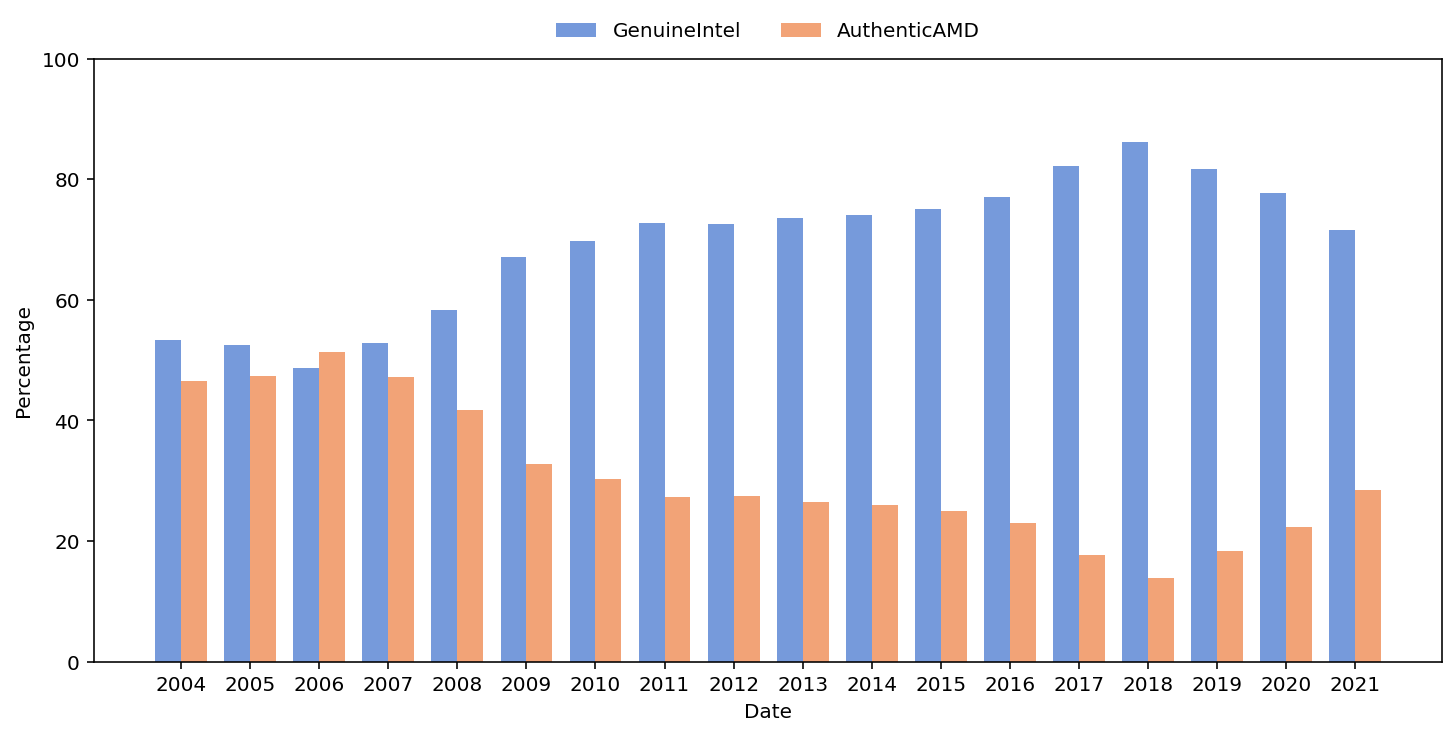

In [7]:
_, ax = plt.subplots(nrows=1, figsize=(10, 5), constrained_layout=True)
ax.set(xlabel="Date", ylabel="Percentage", ylim=[0, 100])
sns.histplot(
    df_cpu_vendor_pc,
    x="year",
    hue="index",
    weights="perc",
    multiple="dodge",
    discrete=True,
    hue_order=["GenuineIntel", "AuthenticAMD"],
    palette="muted",
    shrink=0.75,
    linewidth=0.0,
    ax=ax,
)
sns.move_legend(
    ax, "lower center", bbox_to_anchor=(0.5, 1), ncol=2, title=None, frameon=False
)

Same plot with stacked barchart:

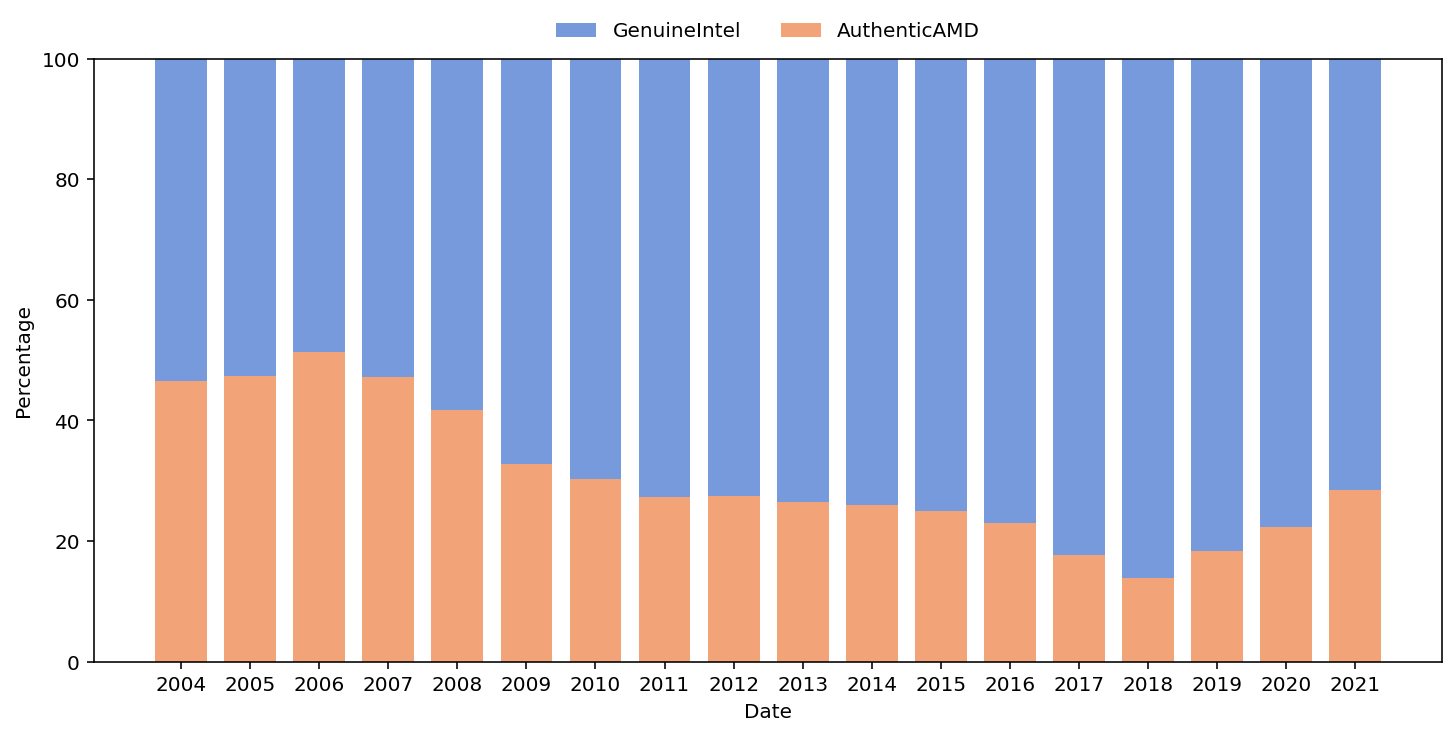

In [8]:
_, ax = plt.subplots(nrows=1, figsize=(10, 5), constrained_layout=True)
ax.set(xlabel="Date", ylabel="Percentage", ylim=[0, 100])
sns.histplot(
    df_cpu_vendor_pc,
    x="year",
    hue="index",
    weights="perc",
    multiple="stack",
    discrete=True,
    hue_order=["GenuineIntel", "AuthenticAMD"],
    palette="muted",
    shrink=0.75,
    linewidth=0.0,
    ax=ax,
)
sns.move_legend(
    ax, "lower center", bbox_to_anchor=(0.5, 1), ncol=2, title=None, frameon=False
)

Monthly share of CPUs with platform information.

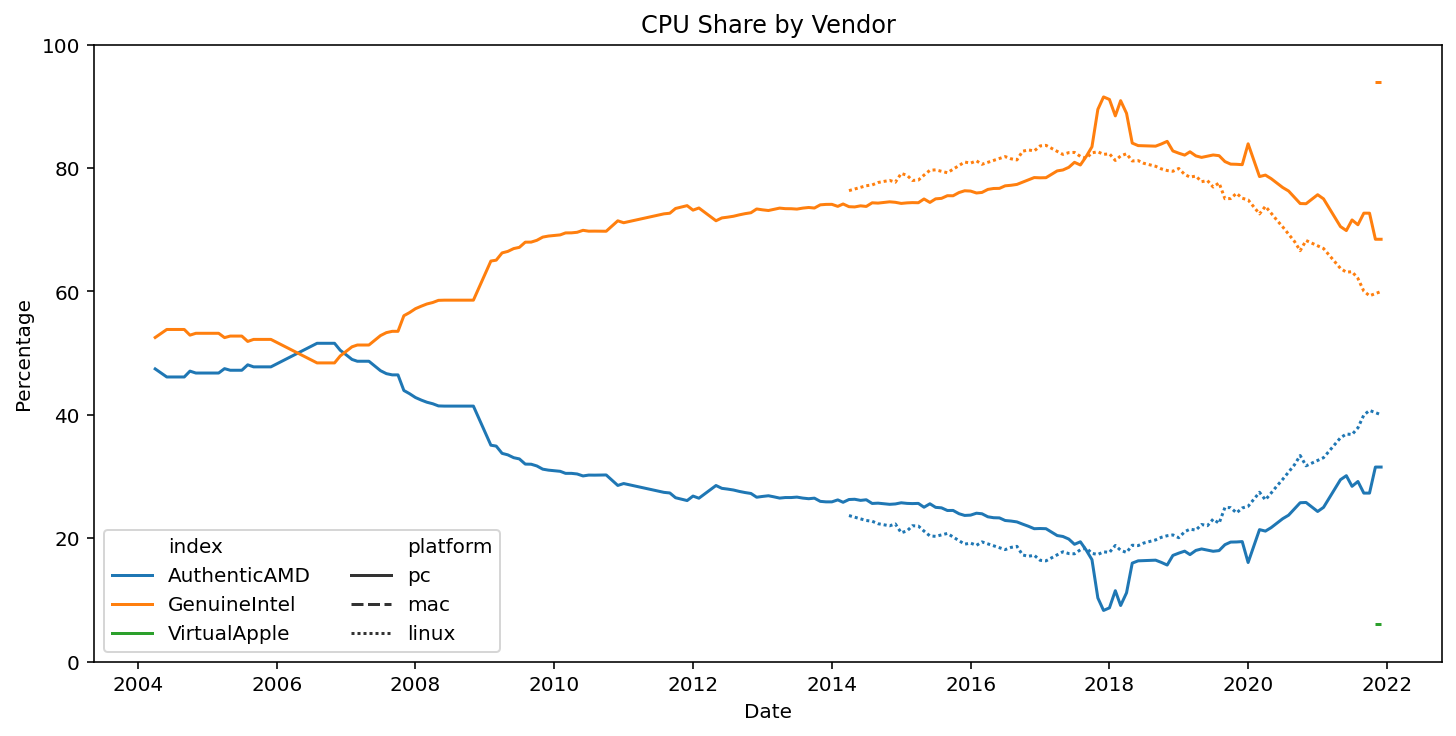

In [9]:
_, ax = plt.subplots(nrows=1, figsize=(10, 5), constrained_layout=True)
sns.lineplot(
    x="date",
    y="perc",
    hue="index",
    style="platform",
    data=df_cpu_vendor,
    style_order=["pc", "mac", "linux"],
)
ax.set(title="CPU Share by Vendor", xlabel="Date", ylabel="Percentage", ylim=[0, 100])
sns.move_legend(ax, "lower left", ncol=2)

## CPU core count

In [10]:
df_num_cpu = df.loc[
    (df["category"] == "Physical CPUs") & (df["index"] != "Unspecified")
].copy()
df_num_cpu["num_cpus"] = df_num_cpu["index"].str.strip("cpus").astype(int)
df_num_cpu.loc[df_num_cpu["num_cpus"] > 16, "index"] = ">16 cpus"
df_num_cpu.drop(columns=["num_cpus"], inplace=True)
df_num_cpu

,index,perc,category,date,platform
140,1 cpu,99.82,Physical CPUs,2004-04-01,pc
141,2 cpus,0.18,Physical CPUs,2004-04-01,pc
142,4 cpus,0.00,Physical CPUs,2004-04-01,pc
365,1 cpu,99.82,Physical CPUs,2004-06-01,pc
366,2 cpus,0.18,Physical CPUs,2004-06-01,pc
...,...,...,...,...,...
262221,>16 cpus,0.01,Physical CPUs,2021-12-01,linux
262222,>16 cpus,0.09,Physical CPUs,2021-12-01,linux
262223,>16 cpus,0.01,Physical CPUs,2021-12-01,linux
262224,>16 cpus,0.00,Physical CPUs,2021-12-01,linux


In [11]:
cat_num_cpu = CategoricalDtype(
    [
        "1 cpu",
        "2 cpus",
        # "3 cpus",
        "4 cpus",
        "6 cpus",
        "8 cpus",
        "10 cpus",
        "12 cpus",
        "16 cpus",
        ">16 cpus",
    ],
    ordered=True,
)
df_num_cpu["index"] = df_num_cpu["index"].astype(cat_num_cpu)

In [12]:
# sum all '+16 cpus' percentages for each month
df_num_cpu = (
    df_num_cpu.groupby(["index", "date", "platform"], as_index=False)
    .sum()
    .replace(0, np.nan)
)
# compute mean annual share
df_num_cpu = (
    df_num_cpu.groupby(["index", df_num_cpu["date"].dt.year, "platform"])
    .mean()
    .reset_index()
)
df_num_cpu["date"] = df_num_cpu["date"].astype(str)

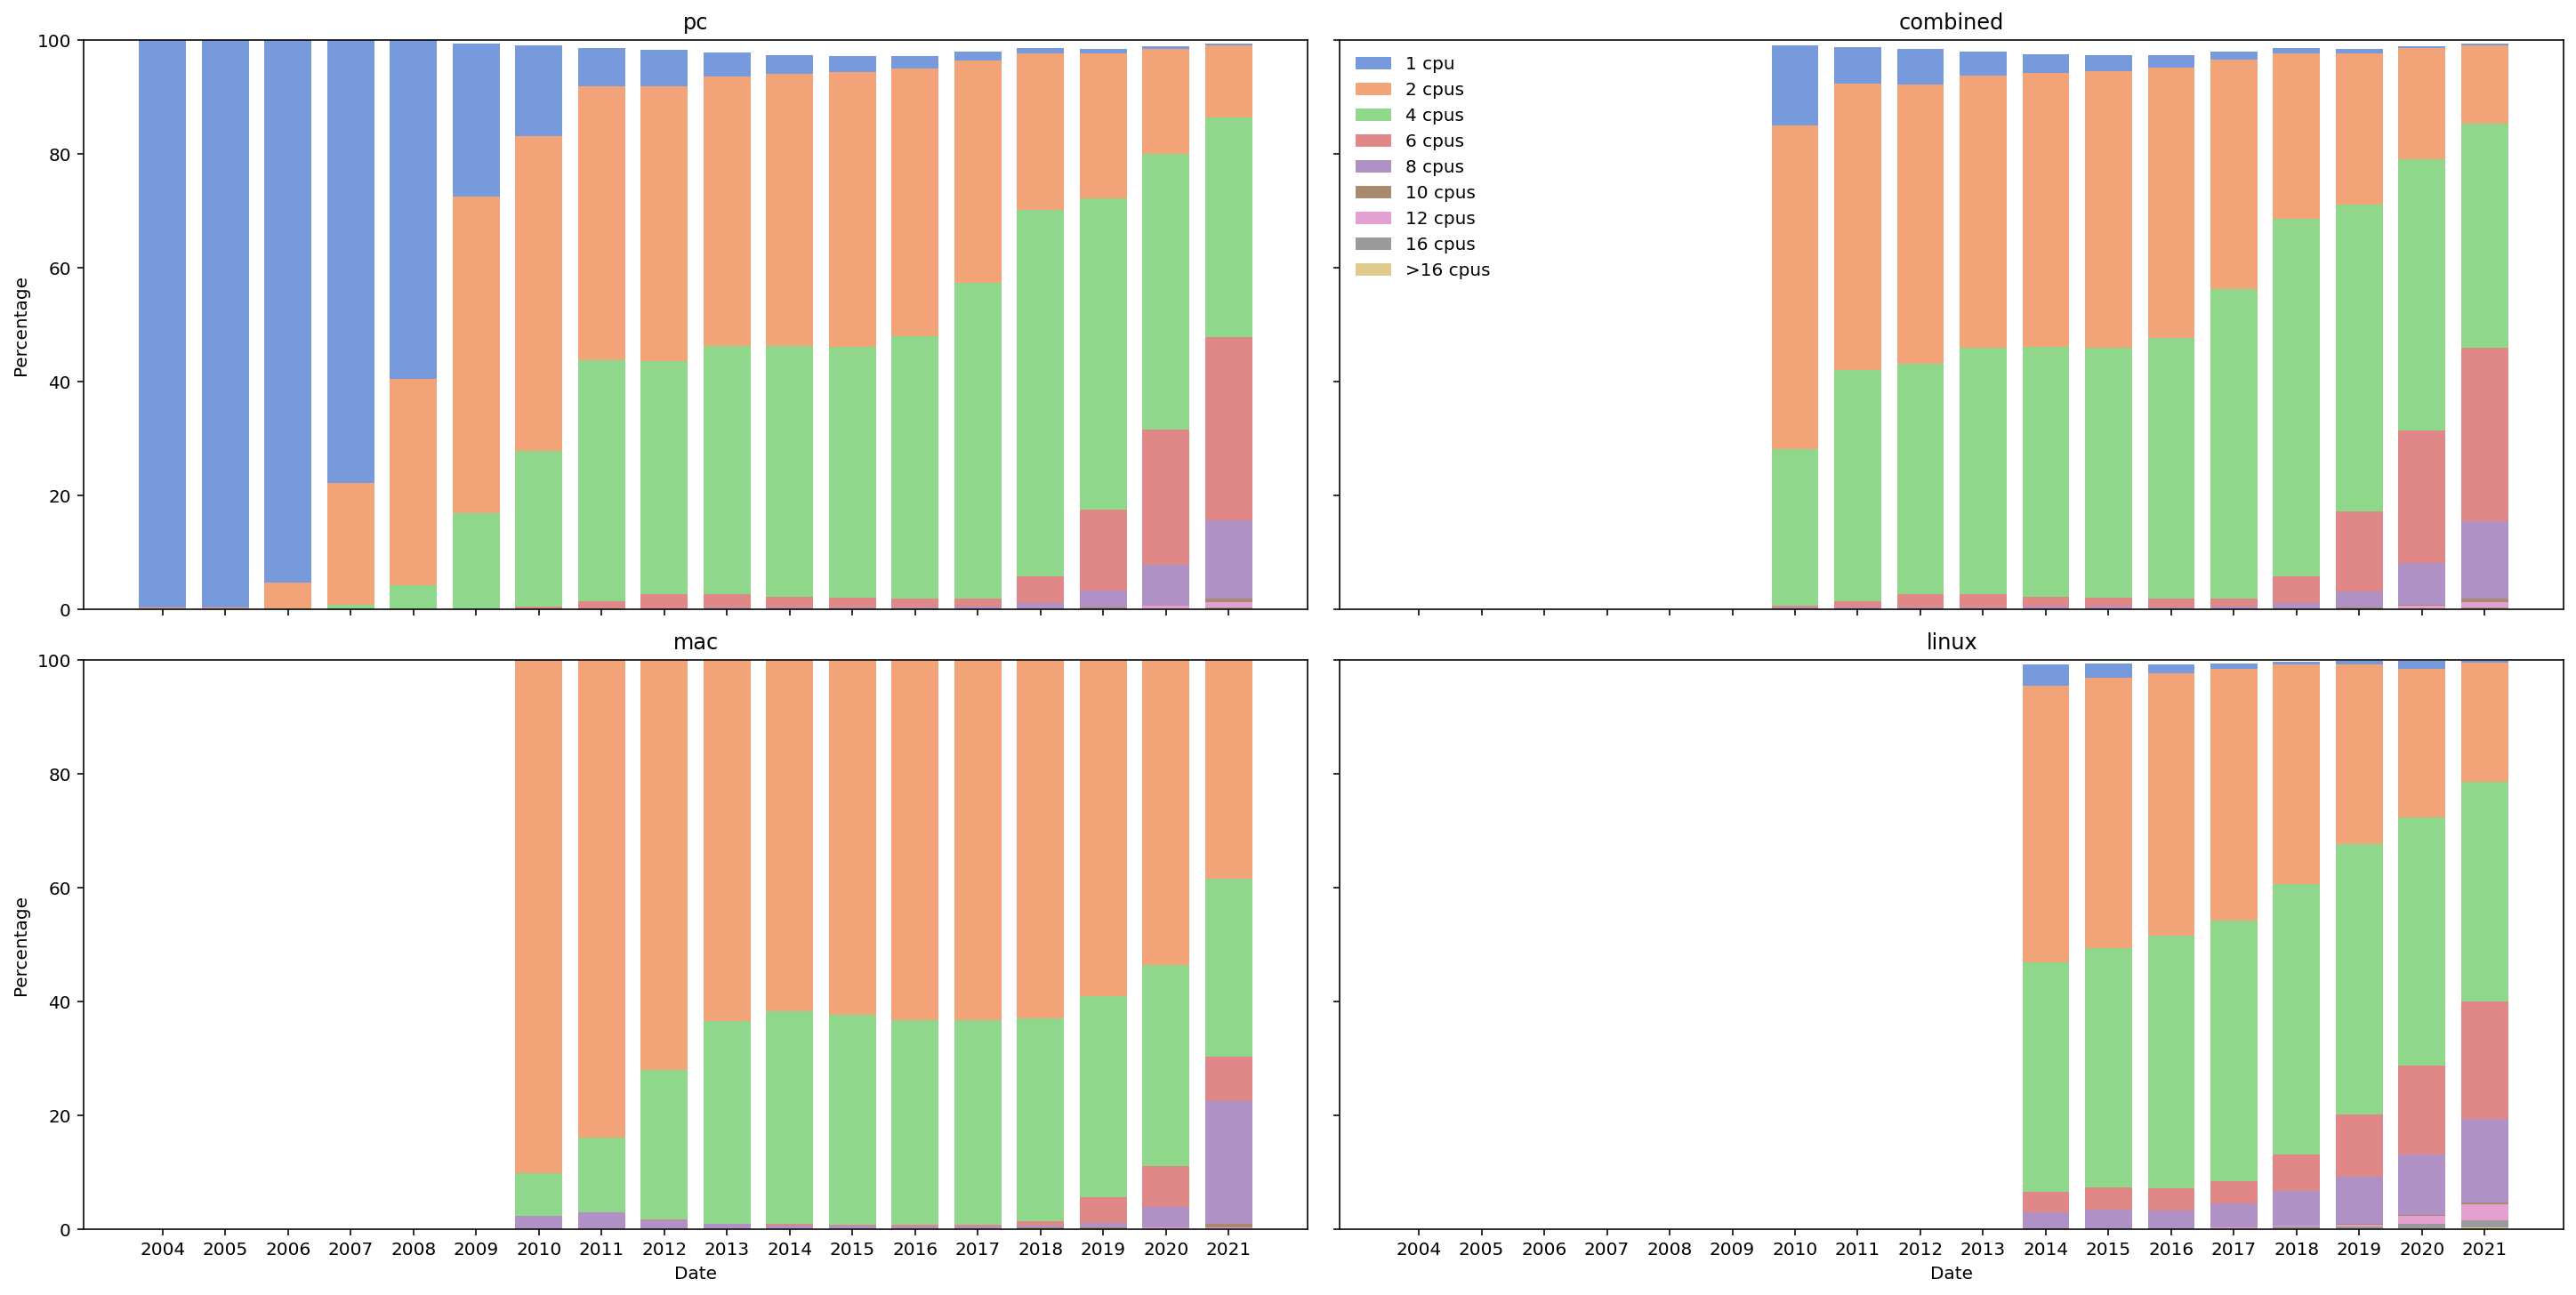

In [13]:
_, axes = plt.subplots(
    nrows=2,
    ncols=2,
    figsize=(20, 10),
    constrained_layout=True,
    sharey=True,
    sharex=True,
)
for ax, subset in zip(axes.flat, ["pc", "combined", "mac", "linux"]):
    sns.histplot(
        df_num_cpu.loc[df_num_cpu["platform"] == subset],
        x="date",
        hue="index",
        weights="perc",
        multiple="stack",
        discrete=True,
        palette="muted",
        shrink=0.75,
        linewidth=0.0,
        ax=ax,
        legend=True if subset == "combined" else False,
    )
    ax.set(title=f"{subset}", xlabel="Date", ylabel="Percentage", ylim=[0, 100])
    if subset == "combined":
        sns.move_legend(
            ax,
            "upper left",
            bbox_to_anchor=(0, 1),
            title=None,
            frameon=False,
        )

In [14]:
df_num_cpu.pivot(index=["platform", "index"], columns="date", values="perc")

date                   2004       2005     2006       2007    2008       2009  \
platform index                                                                  
combined 1 cpu          NaN        NaN      NaN        NaN     NaN        NaN   
         2 cpus         NaN        NaN      NaN        NaN     NaN        NaN   
         4 cpus         NaN        NaN      NaN        NaN     NaN        NaN   
         6 cpus         NaN        NaN      NaN        NaN     NaN        NaN   
         8 cpus         NaN        NaN      NaN        NaN     NaN        NaN   
         10 cpus        NaN        NaN      NaN        NaN     NaN        NaN   
         12 cpus        NaN        NaN      NaN        NaN     NaN        NaN   
         16 cpus        NaN        NaN      NaN        NaN     NaN        NaN   
         >16 cpus       NaN        NaN      NaN        NaN     NaN        NaN   
linux    1 cpu          NaN        NaN      NaN        NaN     NaN        NaN   
         2 cpus         NaN        NaN      NaN        NaN     NaN        NaN   
         4 cpus         NaN        NaN      NaN        NaN     NaN        NaN   
         6 cpus         NaN        NaN      NaN        NaN     NaN        NaN   
         8 cpus         NaN        NaN      NaN        NaN     NaN        NaN   
         10 cpus        NaN        NaN      NaN        NaN     NaN        NaN   
         12 cpus        NaN        NaN      NaN        NaN     NaN        NaN   
         16 cpus        NaN        NaN      NaN        NaN     NaN        NaN   
         >16 cpus       NaN        NaN      NaN        NaN     NaN        NaN   
mac      1 cpu          NaN        NaN      NaN        NaN     NaN        NaN   
         2 cpus         NaN        NaN      NaN        NaN     NaN        NaN   
         4 cpus         NaN        NaN      NaN        NaN     NaN        NaN   
         6 cpus         NaN        NaN      NaN        NaN     NaN        NaN   
         8 cpus         NaN        NaN      NaN        NaN     NaN        NaN   
         10 cpus        NaN        NaN      NaN        NaN     NaN        NaN   
         12 cpus        NaN        NaN      NaN        NaN     NaN        NaN   
         16 cpus        NaN        NaN      NaN        NaN     NaN        NaN   
         >16 cpus       NaN        NaN      NaN        NaN     NaN        NaN   
pc       1 cpu     99.80875  99.735455  95.3225  77.834167  59.521  26.877273   
         2 cpus     0.19125   0.264545   4.6625  21.441667  36.340  55.704545   
         4 cpus         NaN        NaN   0.0300   0.722500   4.117  16.676364   
         6 cpus         NaN        NaN      NaN        NaN     NaN        NaN   
         8 cpus         NaN        NaN      NaN   0.010000   0.016   0.130000   
         10 cpus        NaN        NaN      NaN        NaN     NaN        NaN   
         12 cpus        NaN        NaN      NaN        NaN     NaN        NaN   
         16 cpus        NaN        NaN      NaN        NaN     NaN        NaN   
         >16 cpus       NaN        NaN      NaN        NaN     NaN        NaN   

date                    2010       2011       2012       2013       2014  \
platform index                                                             
combined 1 cpu     13.978000   6.411111   6.219167   4.152500   3.270833   
         2 cpus    56.860000  50.330000  49.110833  47.836667  48.228333   
         4 cpus    27.562000  40.516667  40.516667  43.302500  43.798333   
         6 cpus     0.340000   1.216667   2.314167   2.279167   1.819167   
         8 cpus     0.190000   0.201111   0.222500   0.290833   0.330833   
         10 cpus         NaN        NaN        NaN        NaN        NaN   
         12 cpus    0.010000   0.010000   0.010000   0.010000   0.010000   
         16 cpus         NaN        NaN        NaN        NaN        NaN   
         >16 cpus        NaN        NaN        NaN        NaN        NaN   
linux    1 cpu           NaN        NaN        NaN        NaN   3.693750   
         

## Linux flavors

In [15]:
df_linux = df.loc[(df["category"] == "Linux Version")].copy()
df_linux

,index,perc,category,date,platform
241017,Ubuntu 13.10 64 bit,26.33,Linux Version,2014-02-01,linux
241018,Ubuntu 12.04.3 LTS 64 bit,7.68,Linux Version,2014-02-01,linux
241019,Linux 64 bit,6.76,Linux Version,2014-02-01,linux
241020,Linux Mint 16 Petra 64 bit,6.46,Linux Version,2014-02-01,linux
241021,Ubuntu 13.10,5.25,Linux Version,2014-02-01,linux
...,...,...,...,...,...
262161,Linux Mint 20.2 64 bit,7.04,Linux Version,2021-12-01,linux
262162,Ubuntu 21.10 64 bit,5.42,Linux Version,2021-12-01,linux
262163,Description:Freedesktop.org 21.08.4 (Flatpak r...,4.38,Linux Version,2021-12-01,linux
262164,Linux 5.x 64 bit,4.30,Linux Version,2021-12-01,linux


In [16]:
df_linux["index"] = (
    df_linux["index"]
    .replace(to_replace=r" \d.*$", value="", regex=True)
    .astype("category")
)
# sum the cleaned distro shares
df_linux = df_linux.groupby(["index", "date"], as_index=False).sum()
# compute mean annual share
df_linux = df_linux.groupby(["index", df_linux["date"].dt.year]).mean().reset_index()
df_linux["date"] = df_linux["date"].astype(str)

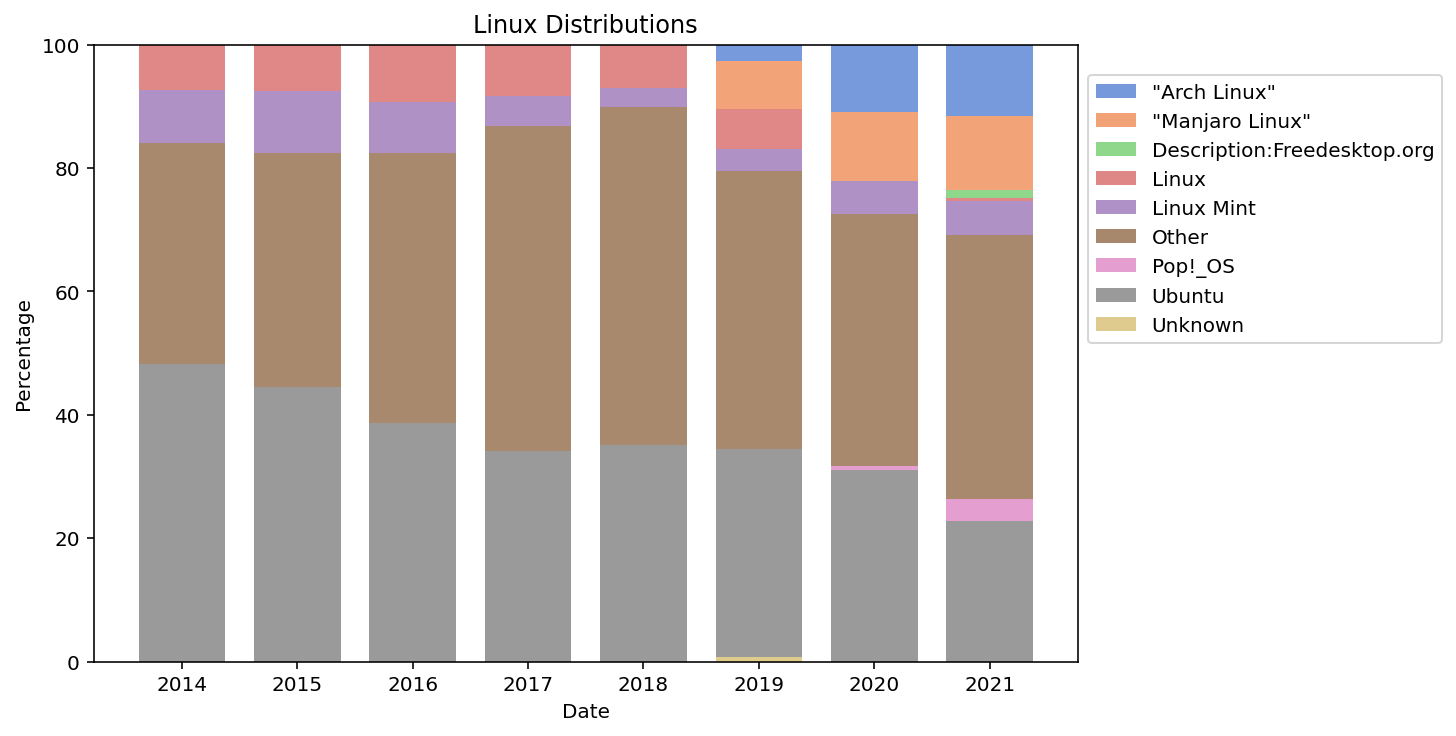

In [17]:
_, ax = plt.subplots(nrows=1, figsize=(10, 5), constrained_layout=True)
sns.histplot(
    df_linux,
    x="date",
    hue="index",
    weights="perc",
    multiple="stack",
    discrete=True,
    palette="muted",
    shrink=0.75,
    linewidth=0.0,
    ax=ax,
)
ax.set(title="Linux Distributions", xlabel="Date", ylabel="Percentage", ylim=[0, 100])
sns.move_legend(ax, "lower left", bbox_to_anchor=(1, 0.5), title=None)

In [18]:
df_linux.pivot(index=["index"], columns="date", values="perc").replace(0, np.nan)

date,2014,2015,2016,2017,2018,2019,2020,2021
index,,,,,,,,
"""Arch Linux""",NaN,NaN,NaN,NaN,NaN,2.688333,10.992222,11.55625
"""Manjaro Linux""",NaN,NaN,NaN,NaN,NaN,7.785833,11.112222,12.01125
Description:Freedesktop.org,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.24500
Linux,7.32625,7.554444,9.317778,8.327,7.020909,6.445833,NaN,0.53750
Linux Mint,8.66875,10.018889,8.320000,4.944,3.080909,3.533333,5.396667,5.51750
Other,35.82125,37.968889,43.762222,52.562,54.845455,45.117500,40.744444,42.72625
Pop!_OS,NaN,NaN,NaN,NaN,NaN,NaN,0.635556,3.58250
Ubuntu,48.18125,44.457778,38.600000,34.169,35.054545,33.698333,31.118889,22.82625
Unknown,NaN,NaN,NaN,NaN,NaN,0.730833,NaN,NaN


The category `Other` shadows many distribution versions, so be careful making assumptions with these values. Another source of distribution usage is [All Roads Lead to Arch: The Evolution of Linux Distros Used for Gaming Over Time](https://boilingsteam.com/all-roads-lead-to-arch-the-evolution-of-linux-distros-used-for-gaming-over-time), although the series begins at the end of 2018.